In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

In [3]:
train.shape


(1080, 12289)

In [4]:
train.head()


,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,label
0,227,220,214,227,221,215,227,222,215,227,...,209,210,210,209,210,209,208,209,209,5
1,238,232,223,238,232,223,238,232,223,237,...,214,203,194,215,203,194,215,204,192,0
2,228,220,208,228,220,208,227,219,208,227,...,208,204,200,210,206,201,211,207,202,2
3,228,219,208,229,219,208,228,220,208,227,...,199,194,194,200,195,193,201,196,193,5
4,225,217,204,225,218,205,225,218,206,225,...,205,202,201,202,199,198,199,195,192,2


In [5]:
labels = train['label'].values

In [6]:
unique_val = np.array(labels)
np.unique(unique_val)

array([0, 1, 2, 3, 4, 5], dtype=int64)

<Axes: ylabel='count'>

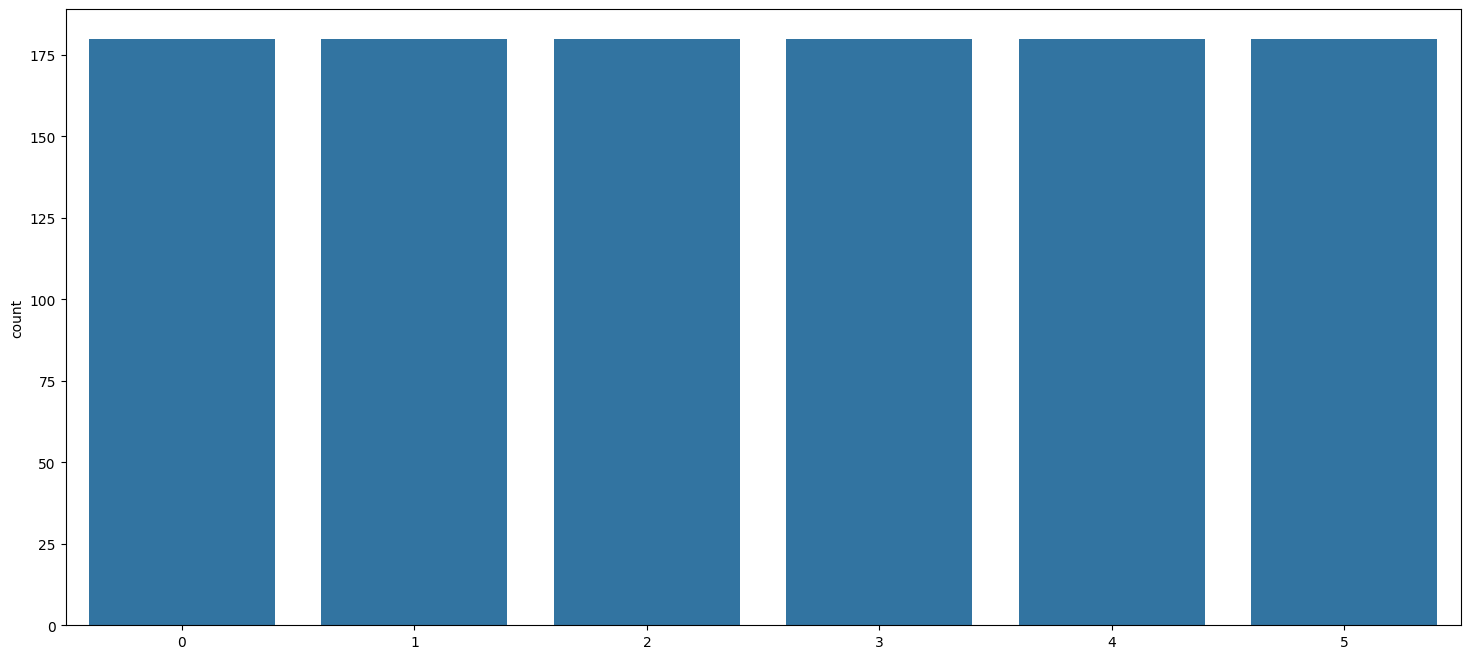

In [7]:
plt.figure(figsize = (18,8))
sns.countplot(x=labels)

In [8]:
train.drop('label',axis=1,inplace=True)

In [9]:
images = train.values
images = np.array([np.reshape(i,(64,64,3)) for i in images])

In [10]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)

In [11]:
labels


array([[0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]])

[0 0 1 0 0 0]


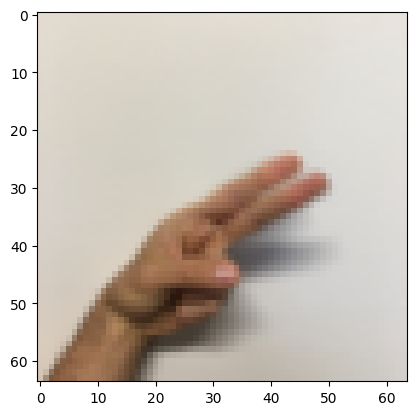

In [12]:
index = 2
print(labels[index])
plt.imshow(images[index].reshape(64,64,3))

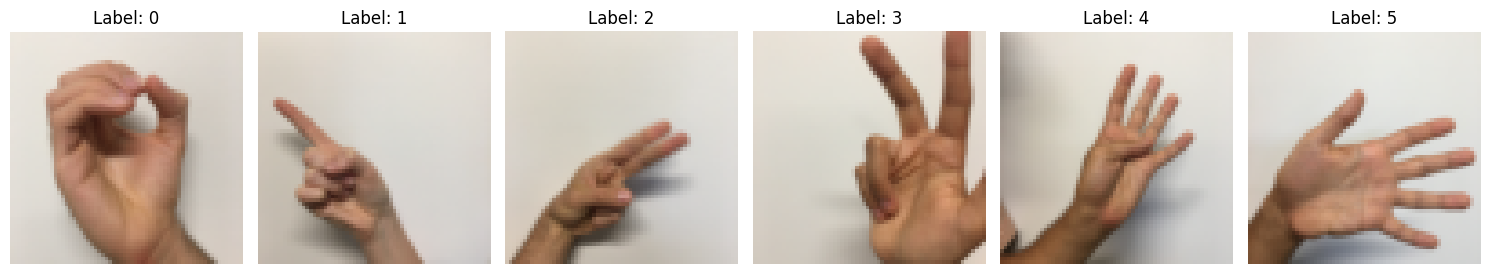

In [13]:
import matplotlib.pyplot as plt
import numpy as np

unique_labels = np.unique(unique_val)  # should be [0, 1, 2, 3, 4, 5]

plt.figure(figsize=(15, 3))

for idx, label in enumerate(unique_labels):
    index = np.where(unique_val == label)[0][0]  # get first image of this label
    img = images[index].astype(np.uint8)

    plt.subplot(1, len(unique_labels), idx + 1)
    plt.imshow(img)
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [14]:
 from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 6
epochs = 18

In [16]:
x_train = x_train / 255
x_test = x_test / 255

In [17]:
x_test.shape


(324, 64, 64, 3)

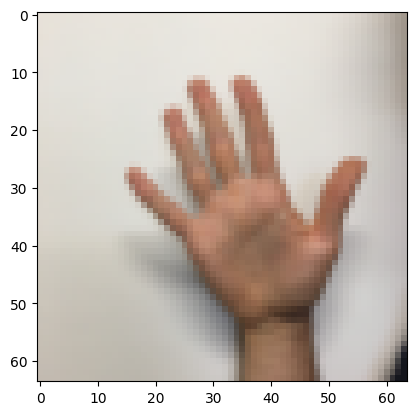

In [18]:
x_train = x_train.reshape(x_train.shape[0],64,64,3)
x_test = x_test.reshape(x_test.shape[0],64,64,3)

plt.imshow(x_train[0].reshape(64,64,3))

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))


C:\Users\l\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# compile our Model
model.compile(loss='categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

In [21]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,645,254 (6.28 MB)

 Trainable params: 1,645,254 (6.28 MB)

 Non-trainable params: 0 (0.00 B)

None


In [22]:
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=epochs,
    batch_size=batch_size
)


Epoch 1/18
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 306ms/step - accuracy: 0.1437 - loss: 1.9719 - val_accuracy: 0.2191 - val_loss: 1.7867
Epoch 2/18
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - accuracy: 0.2070 - loss: 1.7797 - val_accuracy: 0.2315 - val_loss: 1.7639
Epoch 3/18
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step - accuracy: 0.2976 - loss: 1.7404 - val_accuracy: 0.4228 - val_loss: 1.6647
Epoch 4/18
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - accuracy: 0.3936 - loss: 1.6211 - val_accuracy: 0.4877 - val_loss: 1.4969
Epoch 5/18
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - accuracy: 0.4815 - loss: 1.4359 - val_accuracy: 0.5340 - val_loss: 1.4149
Epoch 6/18
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - accuracy: 0.5759 - loss: 1.2963 - val_accuracy: 0.5617 - val_loss: 1.2112
Epoch 7/18
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - accuracy: 0.5836 - loss: 1.1224 - val_accuracy: 0.6111 - val_loss: 1.0934
Epoch 8/18
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 0.6541 - loss: 1.0091 - val_accuracy: 0.6914 - val_loss:

In [23]:
# save our Model
model.save("sign_mnist_cnn_50_Epochs.h5")
print("Model Saved")

Model Saved


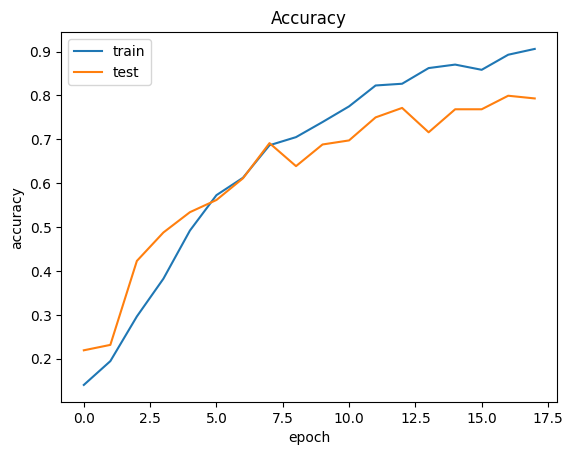

In [24]:
# View our training history graphically
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel( 'epoch')
plt.ylabel( 'accuracy')
plt.legend(['train','test'])

plt.show()

In [25]:
# Create function to match label to letter
def getletter(result):
    classLabels = { 0: 'FORWARD',
                    1: 'BACKWARD',
                    2: 'RIGHT',
                    3: 'LEFT',
                    4: 'UP',
                    5: 'DOWN'}
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "error"
    

                   

In [26]:
from tensorflow.keras.models import load_model

# Load the model from file
model = load_model("sign_mnist_cnn_50_Epochs.h5")

print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [33]:
import cv2
import numpy as np
# Start camera
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    # Define the region of interest
    roi = frame[100:400, 320:620]  # Adjust if needed
    cv2.rectangle(frame, (320, 100), (620, 400), (255, 0, 0), 2)
    
    # Resize and preprocess
    roi_resized = cv2.resize(roi, (64, 64), interpolation=cv2.INTER_AREA)
    roi_normalized = roi_resized.astype(np.float32) / 255.0
    roi_input = roi_normalized.reshape(1, 64, 64, 3)

    # Predict
    prediction = model.predict(roi_input)
    result_index = np.argmax(prediction[0])
    predicted_letter = getletter(result_index)

    # Display result
    cv2.putText(frame, f"Predicted: {predicted_letter}", (50, 80),
                cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 3)

    # Show the frame
    cv2.imshow("Real-Time Prediction", frame)

    # Exit on 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

Accuracy is low because difference between the dataset images camera and your camera and to further increase accuracy try some other hyper parameters and train more no. of epochs or developed your own dataset with same camera where you want real time execution or train on large data this data is also very small